In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py
from scipy.stats import entropy
from collections import Counter
from activ import load_data
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
fulldata = pd.read_csv('/Users/ahyeon/Desktop/TBIanalysis/data/preprocessed_data_matrix.csv', encoding = "ISO-8859-1")
fulldata = fulldata.fillna(-1)
fulldata.shape

(586, 919)

In [17]:
fulldata

,Unnamed: 0,Age,Sex,RaceAmericanIndian,RaceAlaskan,RaceAmAl,RaceAsian,RaceBlack,RaceHAPI,RaceWhite,...,ICHponsright,ICHponsleft,ICHmedullaright,ICHmedullaleft,ICHcerebellumright,ICHcerebellumleft,MidlineShiftmm,cisternalcompressionSeverity,Fourthventricleshift,Thirdventricleobliteration
0,BR-1001,18,Male,No,No,No,No,No,No,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BR-1003,49,Male,No,No,No,No,No,No,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BR-1004,24,Male,No,No,No,No,Yes,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BR-1006,20,Male,No,No,No,No,No,No,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BR-1007,54,Male,No,No,No,No,No,No,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,BR-1008,45,Male,No,No,No,No,No,No,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,BR-1009,67,Male,No,No,No,No,No,No,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
7,BR-1010,16,Male,No,No,No,No,No,No,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,BR-1011,46,Male,No,No,No,No,Yes,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,BR-1012,60,Male,No,No,No,No,No,No,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
subdata = load_data()
nmfdata = load_data(uoinmf=True)
sub_oc_features = subdata.outcome_features
sub_bm_features = subdata.biomarker_features
oc_bases = nmfdata.outcome_bases
sub_oc = subdata.outcomes
sub_bm = subdata.biomarkers
sub_bm_features

array(['Age', 'Sex', 'RaceAmericanIndian', 'RaceAmAl', 'RaceAsian',
       'RaceBlack', 'RaceHAPI', 'RaceWhite', 'RACE_3CAT_Black',
       'RACE_3CAT_Other', 'RACE_3CAT_White', 'PMH_Cardiac_ANY',
       'PMH_Cardiac_CHD', 'PMH_Cardiac_Arrythmia',
       'PMH_Cardiac_IschemicHD', 'PMH_Cardiac_ValvularHD',
       'PMH_Cardiac_HTN', 'PMH_Cardiac_Thromboembolic', 'PMH_Cardiac_PVD',
       'PMH_Cardiac_Other', 'PMH_Endocrine_ANY', 'PMH_Endocrine_Thyroid',
       'PMH_Endocrine_DiabetesIDDM', 'PMH_Endocrine_DiabetesNIDDM',
       'PMH_Endocrine_Other', 'PMH_EENT_ANY', 'PMH_EENT_Sinusitis',
       'PMH_EENT_Vision', 'PMH_EENT_Hearing', 'PMH_EENT_Other',
       'PMH_GI_ANY', 'PMH_GI_GERD', 'PMH_GI_Bleed', 'PMH_GI_IBS',
       'PMH_GI_Other', 'PMH_Hema_ANY', 'PMH_Hema_Anemia', 'PMH_Hema_HIV',
       'PMH_Hema_AIDS', 'PMH_Hema_Other', 'PMH_Hepatic_ANY',
       'PMH_Hepatic_Hepatitis', 'PMH_Hepatic_Cirrhosis',
       'PMH_Hepatic_Other', 'PMH_MSK_ANY', 'PMH_MSK_Arthritis',
       'PMH_MSK_Other',

In [23]:
for ii,c in enumerate(fulldata.columns):
    if 'Gcs' in c or 'GCS' in c:
        print(ii,c)

133 GcsPreHospScoreTimeSinceInj
134 GcsPreHospScore
156 GcsEDArrScoreTimeSinceInj
157 GcsEDArrAssmtCond
158 admGCSeyes
159 admGCSeyes.t
160 admGCSverb
161 admGCSverb.t
162 admGCSmotor
163 admGCSmotor.t
164 GcsEDArrScore
165 admGCSuntest
166 admGCS
167 GCSMildModSevereRaw
168 GCSMildModSevereRecode
169 GcsEDArrPupils
170 GcsEDPupilSizeR
171 GcsEDArrPupilReactR
172 GcsEDPupilSizeL
173 GcsEDArrPupilReactL
181 GcsEDDischEyes
182 GcsEDDischVerbal
183 GcsEDDischMotor
184 GcsEDDischPupils
185 GcsEDDischScore
186 GcsEDDischScoreTimeSinceInj
187 GcsEDDischAssmtCond
749 GranulocyteColonyStimulatingFactorGCSFpgml


In [20]:
for ii,c in enumerate(sub_bm_features):
    if 'Gcs' in c:
        print(ii,c)

In [27]:
for ii,c in enumerate(fulldata.columns):
    if 'Neuro' in c:
        print(ii,c)


67 PMH_Neuro_SCI
68 PMH_Neuro_VertebralInjury
69 PMH_Neuro_BrainTumor
70 PMH_Neuro_CVAnomaly
71 PMH_Neuro_CVAccident
72 PMH_Neuro_TIA
73 PMH_Neuro_SZ
74 PMH_Neuro_SZfebrile
75 PMH_Neuro_SZposttraumatic
76 PMH_Neuro_SZidiopathic
77 PMH_Neuro_SZalcohol
78 PMH_Neuro_EpilepsyPartial
79 PMH_Neuro_EpilepsyOther
80 PMH_Neuro_Headache
81 PMH_Neuro_Migraine
82 PMH_Neuro_Other
286 NeuroProcedureInHospital
287 NeuroProcedureNumbers
293 NeuromonitoringYesNo
354 NeuroPhysHeadache3mo
355 NeuroPhysNausea3mo
356 NeuroPhysVomiting3mo
357 NeuroPhysBalanceProbl3mo
358 NeuroPhysDizziness3mo
359 NeuroPhysVisualProbl3mo
360 NeuroPhysFatigue3mo
361 NeuroPhysLightSensitivity3mo
362 NeuroPhysNoiseSensitivity3mo
363 NeuroPhysNumbnessTingling3mo
364 NeuroSleepDrowsiness3mo
365 NeuroSleepSleepingLess3mo
366 NeuroSleepSleepingMore3mo
367 NeuroSleepTroubleFallingAsleep3mo
368 NeuroCognitiveFoggy3mo
369 NeuroCognitiveSlowedDown3mo
370 NeuroCognitiveDiffConcentrating3mo
371 NeuroCognitiveDiffRemembering3mo
372 NeuroE

In [28]:
for ii,c in enumerate(sub_oc_features):
    if 'GOSE' in c:
        print(ii,c)


0 GOSE_NeedAssistance3M
1 GOSE_WorkResume3M
2 GOSE_DisruptRelation3M
3 GOSE_OtherIssues3M
4 GOSE_OverallScore3M
24 GOSE_Reponder6M_Patient.alone
25 GOSE_Reponder6M_Patient.plus.relative
26 GOSE_NeedAssistance6M
27 GOSE_Travel6M
28 GOSE_SocialResume6M
29 GOSE_OtherIssues6M
30 GOSE_Epilepsy6M
31 GOSE_EpilepsyRisk6M
32 GOSE_OverallScore6M


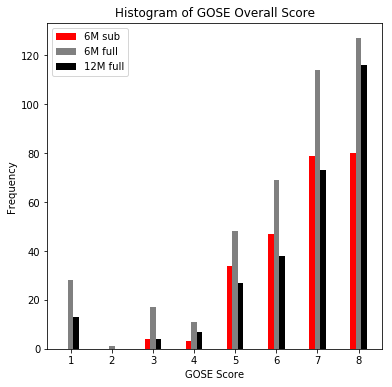

In [29]:
plt.subplots(figsize = (6,6))
plt.hist([sub_oc[:,32],fulldata['GOSE_OverallScore6M'], fulldata['GOSE_OverallScore12M']], align='left', bins=np.arange(1,9,0.5), label=['6M sub','6M full','12M full'], color=['red','grey','black'])
plt.title('Histogram of GOSE Overall Score')
plt.xlabel('GOSE Score')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('/Users/ahyeon/Desktop/activ misc/gose_hist.pdf')

Text(0.5,1,'GcsPreHospScoreTimeSinceInj Histogram')

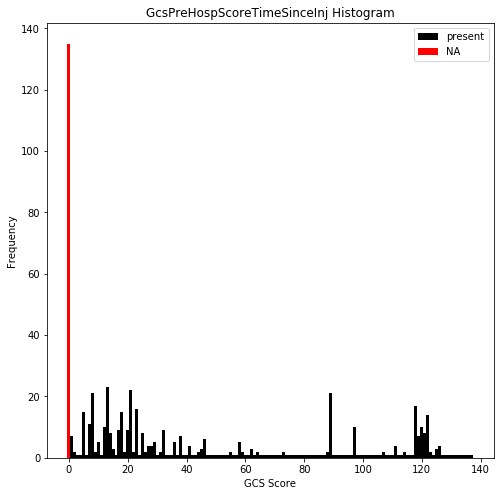

In [7]:
gcs = fulldata.GcsPreHospScoreTimeSinceInj
labels, values = zip(*Counter(gcs).items())
indexes = np.arange(len(labels))
width=1
plt.figure(figsize=(8,8))
plt.bar(indexes, values, width, color='black', label='present')
plt.bar(indexes[0], values[0], width, color='red', label='NA')
plt.legend()
plt.xlabel('GCS Score')
plt.ylabel('Frequency')
plt.title('GcsPreHospScoreTimeSinceInj Histogram')

In [8]:
def gcs_hist(fulldata, name):
    data = fulldata[name]
    labels, values = zip(*Counter(data).items())
    indexes = np.arange(len(labels))
    width=1
    plt.figure(figsize=(5,5))
    plt.bar(labels, values, width, color='black', label='present')
    
    for ii,l in enumerate(labels):
        if l==-1:
            plt.bar(-1, values[ii], width, color='red', label='NA')
            print(values[labels==l])
    plt.legend()
    plt.xlabel('GCS Score')
    plt.ylabel('Frequency')
    plt.title('{} Histogram'.format(str(name)))


In [21]:
def category(fulldata, name):
    dat = fulldata[name]
    dat = dat.replace({-1: 'NA'})
    labels, values = zip(*Counter(dat).items())
    plt.figure(figsize=(6,6))
    plt.bar(labels, values, color='black')
    plt.xticks(rotation=25)
    plt.xlabel('GCS Category')
    plt.ylabel('Frequency')
    plt.ylim([0,550])
    plt.title('{} Histogram'.format(str(name)))
    plt.gcf().subplots_adjust(bottom=0.15)


In [22]:
categories = ['GcsEDArrAssmtCond','GcsEDArrPupilReactL','GcsEDDischPupils','GcsEDDischAssmtCond','GcsEDArrPupilReactR']

In [23]:
times = ['GcsPreHospScoreTimeSinceInj','GcsEDArrScoreTimeSinceInj','GcsEDDischScoreTimeSinceInj']

<Figure size 432x288 with 0 Axes>

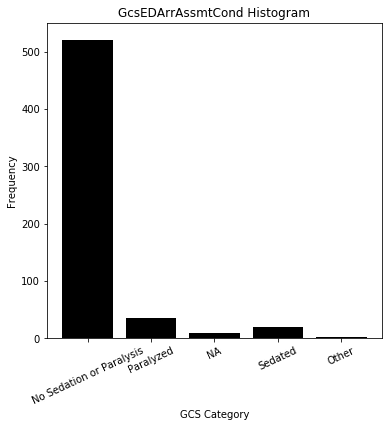

<Figure size 432x288 with 0 Axes>

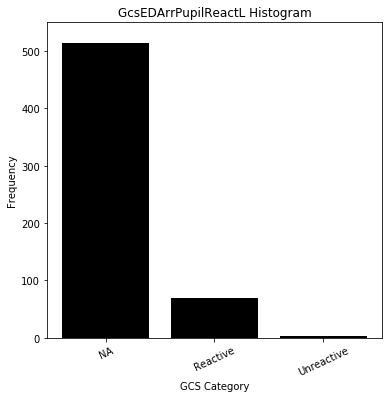

<Figure size 432x288 with 0 Axes>

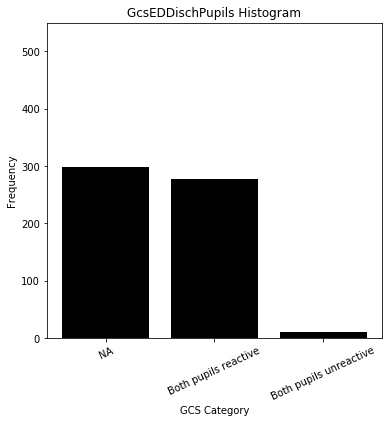

<Figure size 432x288 with 0 Axes>

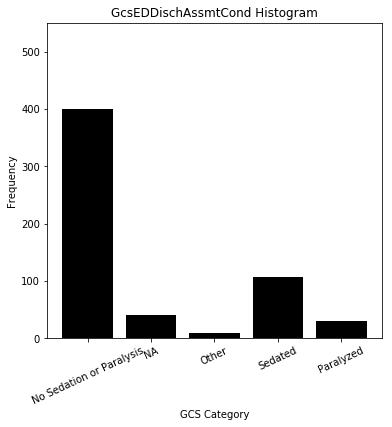

<Figure size 432x288 with 0 Axes>

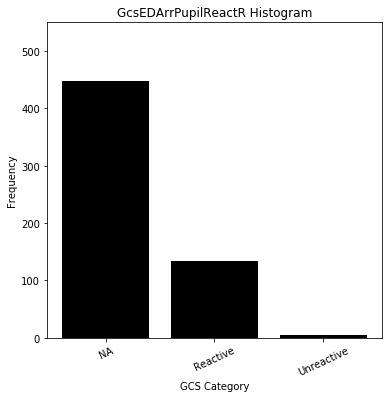

In [24]:
with PdfPages('/Users/ahyeon/Desktop/activ misc/categories_gcs.pdf') as pdf:
    for cat in categories:
        plt.figure()
        fig = category(fulldata, cat)
        pdf.savefig(fig)

In [9]:
for c in fulldata.columns:
    if 'Gcs' in c:
        print(c)

GcsPreHospScoreTimeSinceInj
GcsPreHospScore
GcsEDArrScoreTimeSinceInj
GcsEDArrAssmtCond
GcsEDArrScore
GcsEDArrPupils
GcsEDPupilSizeR
GcsEDArrPupilReactR
GcsEDPupilSizeL
GcsEDArrPupilReactL
GcsEDDischEyes
GcsEDDischVerbal
GcsEDDischMotor
GcsEDDischPupils
GcsEDDischScore
GcsEDDischScoreTimeSinceInj
GcsEDDischAssmtCond


106
103
469
149
144
433
412
455
402


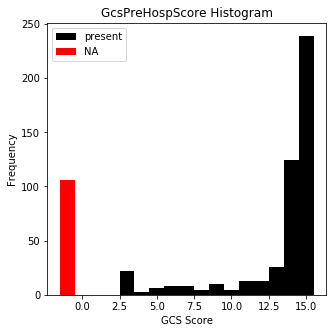

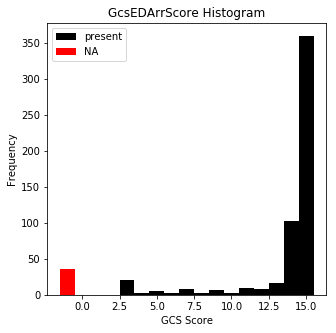

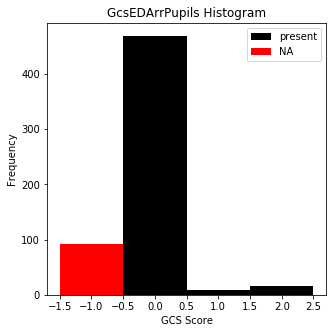

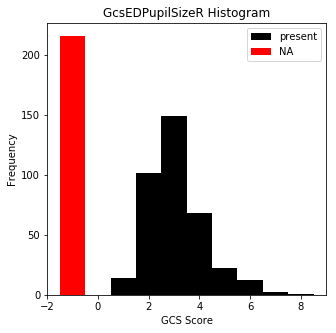

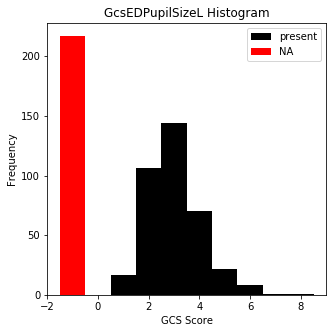

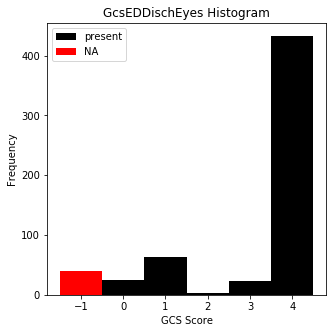

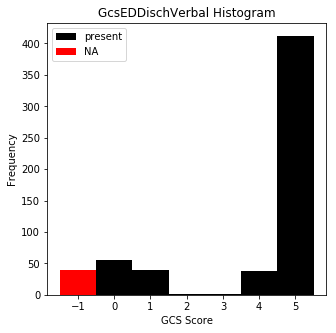

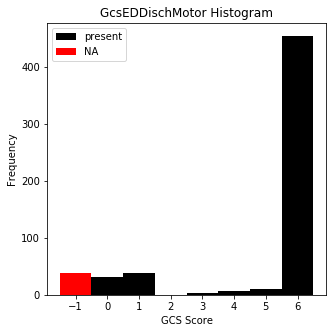

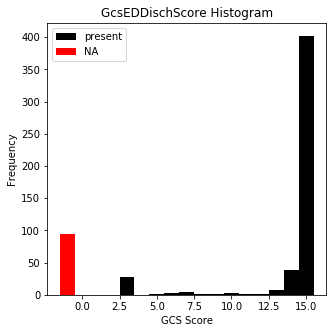

In [46]:
with PdfPages('/Users/ahyeon/Desktop/activ misc/scores_gcs.pdf') as pdf:
    for c in fulldata.columns:
        if ('Gcs' in c) and (c not in categories) and (c not in times):
            fig = gcs_hist(fulldata, c)
            pdf.savefig(fig)

135


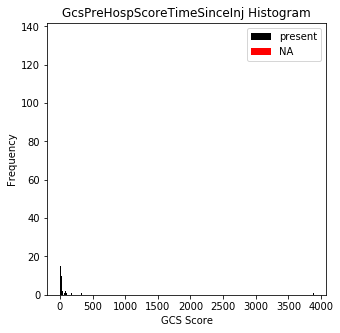

In [11]:
for c in fulldata.columns:
    if 'GcsPreHospScoreTimeSinceInj' in c:
        gcs_hist(fulldata,c)
        

In [12]:
def gcs_hist(fulldata, name):
    data = fulldata[name]
    labels, values = zip(*Counter(data).items())
    indexes = np.arange(len(labels))
    width=1
    plt.figure(figsize=(5,5))
    plt.bar(labels, values, width, color='black', label='present')
    plt.bar(-1.0, 135, color='red', label='NA')
    plt.legend()
    plt.xlabel('GCS Score')
    plt.ylabel('Frequency')
    plt.title('{} Histogram'.format(str(name)))
    plt.show()

[-1.0, 19.0, 42.0, 67.0, 105.0, 183.0, 534.0]
3885.0


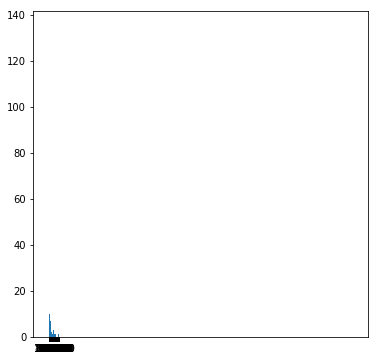

In [13]:
dat = fulldata.GcsPreHospScoreTimeSinceInj
labels, values = zip(*Counter(dat).items())


indexes = np.arange(len(labels))

plt.figure(figsize=(6,6))
plt.bar(labels, values)
plt.xticks(indexes,labels)

labels = sorted(labels)
ticks = labels[0::20]
print(ticks)
print(max(labels))
for ii,l in enumerate(labels):
        if l==-1:
            plt.bar(-1, values[ii], width, color='red', label='NA')

In [47]:
def times_hist(fulldata, name):
    dat = fulldata[name]
    labels, values = zip(*Counter(dat).items())
    plt.hist(dat,label='present', color='black')
    plt.bar(labels[0],values[0], color='red', label='NA')
            
    plt.legend()
    plt.xlabel('Time Since Injury')
    plt.ylabel('Frequency')
    plt.title('{} Histogram'.format(str(name)))


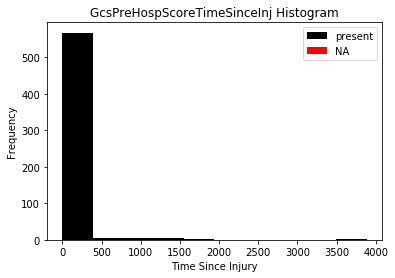

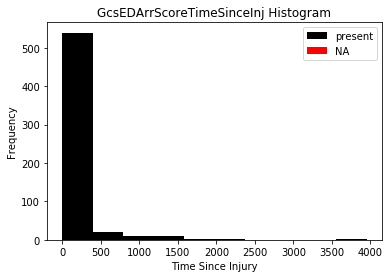

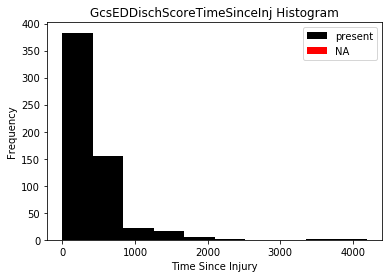

In [49]:
with PdfPages('/Users/ahyeon/Desktop/activ misc/times_gcs.pdf') as pdf:
    for t in times:
        plt.figure()
        fig = times_hist(fulldata, t)
        pdf.savefig(fig)